# Predicting Heart Disease using Machine Learing

> Our problem is to predict the case of heart disease using machine learning and data science. Since, our target is to predict wheather a patient has heart disease or not, where 0(means no heart disease) and 1(means has heart disease)

## What we will be doing?

* Exploratory data analysis (EDA) -we will visualize the datasets and observe the relationshio between different features.
* Model training - creating a model to train our datasets.
* Model evaluation - evaluating a models predictions using problem-specific evaluation metrics.
* Model comparison -we will compare different models and choose the best model from that all.
* Model fine-tuning - we will use GridSearchCv for tuning different hyperparamet


## 1. Problem Definition

The problem is to detect whether the patient has heart disease or not using various features?
> Given the datasets, detect whether the patient has heart disease or not?

## 2.Data
I got the datasets from https://archive.ics.uci.edu/ml/datasets/heart+Disease.So, I would like to credit UCI Machine Repository for this.

## 3.Data Dictionary
The following are the features we'll use to predict our target variable (heart disease or no heart disease).

* age - age in years
* sex - (1 = male; 0 = female)
* cp - chest pain type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non heart related)
3: Asymptomatic: chest pain not showing signs of disease
* trestbps - resting blood pressure (in mm Hg on admission to the hospital)
anything above 130-140 is typically cause for concern
* chol - serum cholestoral in mg/dl
* serum = LDL + HDL + .2 * triglycerides
above 200 is cause for concern
* fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
'>126' mg/dL signals diabetes
* restecg - resting electrocardiographic results
0: Nothing to note
1: ST-T Wave abnormality
can range from mild symptoms to severe problems
signals non-normal heart beat
2: Possible or definite left ventricular hypertrophy
Enlarged heart's main pumping chamber
* thalach - maximum heart rate achieved
* exang - exercise induced angina (1 = yes; 0 = no)
* oldpeak - ST depression induced by exercise relative to rest
looks at stress of heart during excercise
unhealthy heart will stress more
* slope - the slope of the peak exercise ST segment
0: Upsloping: better heart rate with excercise (uncommon)
1: Flatsloping: minimal change (typical healthy heart)
2: Downslopins: signs of unhealthy heart
* ca - number of major vessels (0-3) colored by flourosopy
colored vessel means the doctor can see the blood passing through
the more blood movement the better (no clots)
* thal - thalium stress result
1,3: normal
6: fixed defect: used to be defect but ok now
7: reversable defect: no proper blood movement when excercising
target - have disease or not (1=yes, 0=no) (= the predicted attribute)


 ## 4.Tools for used in our model
* Pandas - for data analysis
* Numpy - for numerical anaylysis and operation
* seaborn - for data visualization
* matplotlib - for data visualization
* scikitlearn - for machine learning and using various evaluation metrics

## Importing various tools for our models

In [321]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [322]:
heart = pd.read_csv('heart-disease.csv')

In [323]:
# Looking for the first five rows
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [324]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [325]:
heart.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [326]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


## We will observe if there is any duplicate value, if there is a such row we will drop this as data redundancy as it will affect our accuracy

In [28]:
heart[heart.duplicated()]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1


In [29]:
heart.drop(heart[heart.duplicated()].index,inplace=True)

In [30]:
heart.target.unique()

array([1, 0], dtype=int64)

## Let's check whether our output or target is balanced or not?

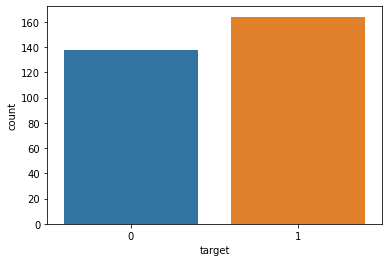

In [32]:
sns.countplot(x='target',data=heart
             );

> It seems like our target variabe is balanced.

In [327]:
heart['cp'].value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

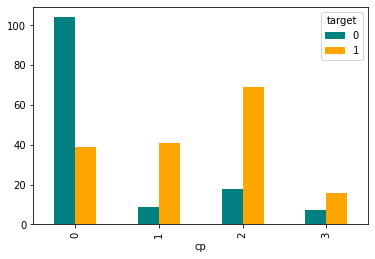

In [328]:
pd.crosstab(heart['cp'],heart['target']).plot(kind="bar",color=['teal','orange']);

In [329]:
heart.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


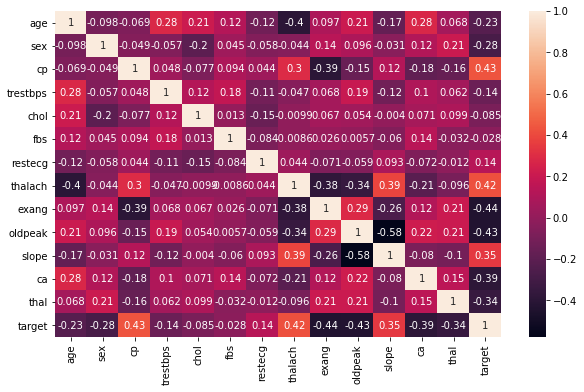

In [330]:
fig, ax = plt.subplots(figsize=(10,6))
ax = sns.heatmap(heart.corr(),annot=True)

In [331]:
for i in heart.columns:
    print(i,":",heart[i].unique())
    print(" - "*40)
    print(" - "*40)

age : [63 37 41 56 57 44 52 54 48 49 64 58 50 66 43 69 59 42 61 40 71 51 65 53
 46 45 39 47 62 34 35 29 55 60 67 68 74 76 70 38 77]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
sex : [1 0]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
cp : [3 2 1 0]
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
trestbps : [145 130 120 140 172 150 110 135 160 105 125 142 155 104 138 128 108 134
 122 115 118 100 124  94 112 10

In [332]:
for i in heart.columns:
    print(i,":",heart[i].value_counts())
    print(" - "*40)
    print(" - "*40)

age : 58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
sex : 1    207
0     96
Name: sex, dtype: int64
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
 -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  -  - 
cp : 0    143
2     87
1     50
3     23
Name: cp, dtype: int64
 -  -

In [333]:
from sklearn.model_selection import train_test_split


In [334]:
X = heart.drop('target',axis=1)
y = heart['target']

In [335]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [336]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((242, 13), (61, 13), (242,), (61,))

# We will see if any multicollinearity exits or not, for that we will use variance inflation factor, if variance value is greater than 10 we will consider it as multicollinearity as will drop it.

In [337]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [338]:
X.dropna(inplace=True)

In [339]:
vif = pd.DataFrame()

In [340]:
vif['VIF Factor'] = [variance_inflation_factor(X.values,i)for i in range(X.shape[1])]

In [341]:
vif['features'] = X.columns

In [342]:
vif

,VIF Factor,features
0,38.998305,age
1,3.523211,sex
2,2.414403,cp
3,58.557335,trestbps
4,26.267365,chol
5,1.268205,fbs
6,2.058206,restecg
7,42.742178,thalach
8,2.022527,exang
9,3.062890,oldpeak


## Similarly, we will observe z value to remove the outliers.

In [348]:
from scipy import stats


In [349]:
z = np.abs(stats.zscore(heart))

In [350]:
threshold = 3

In [351]:
print(np.where(z>3))

(array([ 28,  48,  85,  92, 158, 163, 164, 204, 220, 221, 223, 246, 248,
       251, 272, 281], dtype=int64), array([ 4, 12,  4, 11, 11, 11, 11,  9,  4,  9,  3,  4,  3, 11,  7, 12],
      dtype=int64))


In [352]:
z[28][4]

3.2995550358497527

In [353]:
heart_outlier = heart[(z<3).all(axis=1)]

In [354]:
heart_outlier.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [355]:
heart.shape

(303, 14)

In [356]:
heart.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [357]:
X = heart.drop('target',axis=1)
y = heart['target']

In [358]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [359]:
heart.dropna(inplace=True)

In [360]:
vif = pd.DataFrame()

In [361]:
vif['VIF Factor'] = [variance_inflation_factor(heart.values,i)for i in range(heart.shape[1])]

In [362]:
vif['features'] = heart.columns

In [363]:
vif

,VIF Factor,features
0,39.241186,age
1,3.682952,sex
2,2.615083,cp
3,58.629045,trestbps
4,26.276396,chol
5,1.268219,fbs
6,2.081059,restecg
7,47.459548,thalach
8,2.060408,exang
9,3.120906,oldpeak


In [364]:
heart.drop(labels=['age','trestbps','chol','thalach','thal'],axis=1,inplace=True)

In [365]:
heart.shape

(303, 9)

In [366]:
X = heart.drop('target',axis=1)
y = heart['target']

In [367]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Let's use different classification model to see which model will perform best and choose that model

In [224]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


In [225]:
models = {"RandomForestClassifier":RandomForestClassifier(),
         "LogisticRegression":LogisticRegression(),
         "SVC":SVC(),
         "KNN":KNeighborsClassifier(),
         "NaiveBayes":GaussianNB(),
         "XGBoost":XGBClassifier()
        }

In [226]:
def fit_and_train(models,X_train,X_test,y_train,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_test,y_test)
    return model_score

In [227]:
score = fit_and_train(models,X_train,X_test,y_train,y_test)

In [228]:
score

{'RandomForestClassifier': 0.8524590163934426,
 'LogisticRegression': 0.8852459016393442,
 'SVC': 0.8852459016393442,
 'KNN': 0.8360655737704918,
 'NaiveBayes': 0.8032786885245902,
 'XGBoost': 0.8032786885245902}

In [229]:
score_comparision = pd.DataFrame(score,index=[0])

In [230]:
score_comparision

,RandomForestClassifier,LogisticRegression,SVC,KNN,NaiveBayes,XGBoost
0,0.852459,0.885246,0.885246,0.836066,0.803279,0.803279


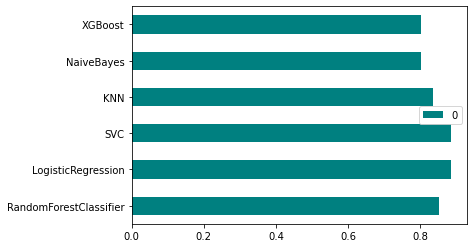

In [231]:
score_comparision.T.plot(kind="barh",color=['teal'])

## Well, we see that here SVC and LogisticRegression model performed the best, but this is in test mode, lets see how it perform in training set as well to know that these model have not over fitted.

# Now lets see in train set as well

In [232]:
def fit_and_test(models,X_train,X_test,y_train,y_test):
    model_score={}
    for name,model in models.items():
        model.fit(X_train,y_train)
        model_score[name] = model.score(X_train,y_train)
    return model_score

In [233]:
score_train = fit_and_test(models,X_train,X_test,y_train,y_test)

In [234]:
score_train

{'RandomForestClassifier': 0.970954356846473,
 'LogisticRegression': 0.8132780082987552,
 'SVC': 0.8672199170124482,
 'KNN': 0.8755186721991701,
 'NaiveBayes': 0.8091286307053942,
 'XGBoost': 0.970954356846473}

In [235]:
score

{'RandomForestClassifier': 0.8524590163934426,
 'LogisticRegression': 0.8852459016393442,
 'SVC': 0.8852459016393442,
 'KNN': 0.8360655737704918,
 'NaiveBayes': 0.8032786885245902,
 'XGBoost': 0.8032786885245902}

# lets use SVC

In [150]:
from sklearn.model_selection import GridSearchCV

In [267]:
parameters = {"kernel":['linear','rbf','poly','sigmoid'],
              "C":[100,10,1,0.1,0.01],
              "gamma":[1,0.1,0.01,0.001]
             }

In [268]:
svc = SVC()

In [282]:
gs = GridSearchCV(svc,parameters,cv=10)

In [283]:
gs.fit(X_train,y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [100, 10, 1, 0.1, 0.01],
                         'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf', 'poly', 'sigmoid']})

In [284]:
gs.best_score_

0.834

In [285]:
gs.best_params_

{'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}

In [286]:
gs.score(X_train,y_train)

0.8755186721991701

In [287]:
gs.score(X_test,y_test)

0.8852459016393442

In [288]:
from sklearn.metrics import confusion_matrix,classification_report

In [289]:
y_prediction = gs.predict(X_test)

In [290]:
confusion_matrix(y_test,y_prediction)

array([[27,  2],
       [ 5, 27]], dtype=int64)

In [291]:
accuracy_compare = pd.DataFrame(data={"actual":y_test,
                                      "predicted":y_prediction
                                     })

In [292]:
accuracy_compare

,actual,predicted
180,0,0
229,0,0
111,1,1
247,0,0
60,1,1
...,...,...
250,0,0
104,1,1
300,0,0
194,0,0


In [293]:
print(classification_report(y_test,y_prediction))

              precision    recall  f1-score   support

           0       0.84      0.93      0.89        29
           1       0.93      0.84      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.89      0.89        61
weighted avg       0.89      0.89      0.89        61



In [300]:
from sklearn.metrics import plot_roc_curve

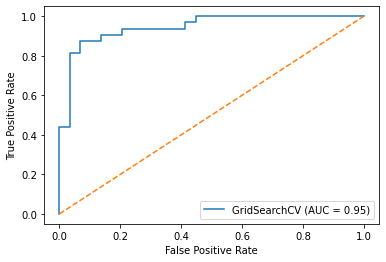

In [320]:
plot_roc_curve(gs,X_test,y_test)
plt.plot([0,1],[0,1],linestyle="--")